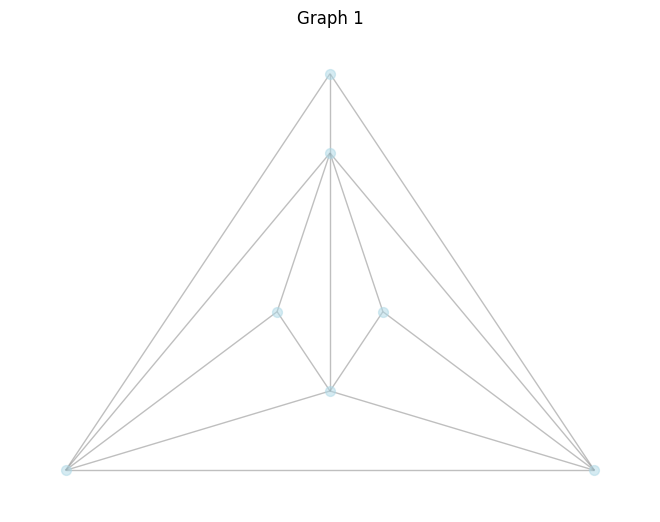

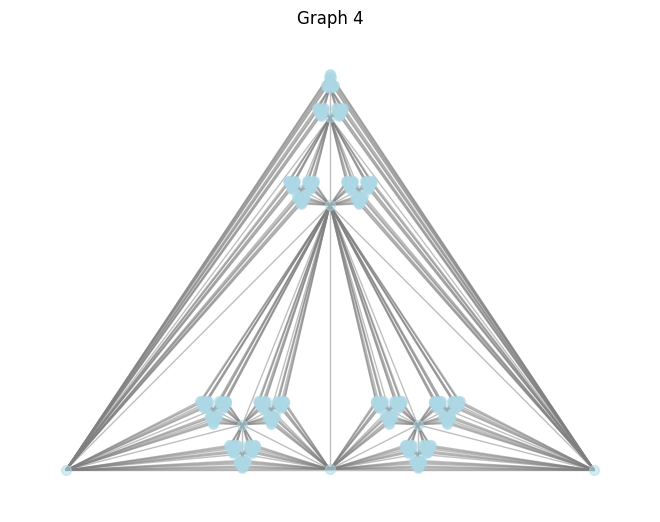

In [94]:
# Build apollonian networks

import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import circlify

def planar_draw(G,itt):
    pos = nx.planar_layout(G)
     # Draw the graph
    nx.draw(G, node_color='lightblue', pos=pos, edge_color='gray', node_size=50, with_labels=False, alpha = 0.5)
    plt.title(f"Graph {itt}")
    plt.show()
    
def create_apollonian_2its():
    # Create an empty graph
    G = nx.Graph()
    
    # Add nodes
    G.add_nodes_from([1, 2, 3, 4,5,6,7])
    
    # Add edges to form a triangle
    G.add_edges_from([(1, 2), (2, 3), (3, 1),(4,1),(4,2),(4,3),(5,4),(5,3),(5,1),(6,4),(6,3),(6,2),(7,1),(7,4),(7,2)])
    
    planar_draw(G,1)
   
    return G

# Call the function to create and display the graph
G = create_apollonian_2its()

def apollo_net(its):
    # Create an empty graph
    graph = nx.Graph()
    
    # Add nodes
    graph.add_nodes_from([1, 2, 3, 4,5,6,7])
    
    # Add edges to form a triangle
    graph.add_edges_from([(1, 2), (2, 3), (3, 1),(4,1),(4,2),(4,3),(5,4),(5,3),(5,1),(6,4),(6,3),(6,2),(7,1),(7,4),(7,2)])
    
    for itt in range(0,its):
        """
        For every node in the graph with the given degree, create new nodes for every 
        combination of two connected nodes, linking the new node to the original and the two nodes.
        
        Parameters:
            graph (networkx.Graph): The input graph.
            target_degree (int): The degree to search for.
        
        Returns:
            networkx.Graph: The modified graph.
        """
        # Identify all nodes with the specified degree
        target_nodes = [node for node in graph.nodes if graph.degree[node] == 3]
        
        # Process each target node
        for target_node in target_nodes:
            # Get neighbors of the target node
            neighbors = list(graph.neighbors(target_node))
            
            # Generate all combinations of 2 neighbors
            for combo in combinations(neighbors, 2):
                # Create a new node (use a unique identifier)
                new_node = f"new_node_{target_node}_{combo[0]}_{combo[1]}"
                
                # Add the new node to the graph
                graph.add_node(new_node)
                
                # Connect the new node to the target node and the two nodes in the combination
                graph.add_edges_from([
                    (new_node, target_node),
                    (new_node, combo[0]),
                    (new_node, combo[1])
                ])
    
    return graph


G = apollo_net(4)
planar_draw(G,4)


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from GraphRicciCurvature.OllivierRicci import OllivierRicci

def draw_graph_with_curvature(graph):
    """
    Calculates the Ollivier-Ricci curvature for each edge in the graph and draws the graph with edges
    colored and labeled by their curvature values.

    Parameters:
    graph (networkx.Graph): The input graph.

    Returns:
    None
    """
    # Step 1: Compute Ollivier-Ricci curvature
    orc = OllivierRicci(graph, alpha=0.5, verbose=False, proc=1)
    orc.compute_ricci_curvature()
    curvature = nx.get_edge_attributes(orc.G, "ricciCurvature")

    # Step 2: Normalize curvature for coloring
    min_curvature = min(curvature.values())
    max_curvature = max(curvature.values())
    curvature_range = max_curvature - min_curvature if max_curvature != min_curvature else 1

    def normalize(value):
        """Normalize curvature value to the range [0, 1] for coloring."""
        return (value - min_curvature) / curvature_range

    # Step 3: Draw the graph
    pos = nx.spring_layout(graph)  # Layout for positioning nodes
    plt.figure(figsize=(8, 6))

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color="lightblue")

    # Draw edges with curvature-dependent colors
    edge_colors = [plt.cm.coolwarm(normalize(curvature[edge])) for edge in graph.edges]
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, edge_cmap=plt.cm.coolwarm, width=2)

    # Add edge labels with curvature values
    edge_labels = {edge: f"{curvature[edge]:.2f}" for edge in graph.edges}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)

    # Draw node labels
    nx.draw_networkx_labels(graph, pos, font_size=12, font_color="black")

    # Add a colorbar for the edge colors
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=min_curvature, vmax=max_curvature))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label("Ollivier-Ricci Curvature", rotation=270, labelpad=15)

    plt.title("Graph with Edges Colored by Ollivier-Ricci Curvature")
    plt.axis("off")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.cycle_graph(5)  # A cycle graph with 5 nodes

    # Draw the graph with curvature
    draw_graph_with_curvature(G)


Incorrect verbose level, option:["INFO","DEBUG","ERROR"], use "ERROR instead."


ValueError: cannot find context for 'fork'